## II- CNN

In [12]:
# Importation des librairies 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


import seaborn as sns  

import tensorflow as tf

import keras

from keras.utils import np_utils
from keras import layers, Model, optimizers, regularizers
from keras.layers.normalization import BatchNormalization
from keras.datasets import mnist
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.layers import 
from keras import backend as k

from keras.models import Sequential

from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#importation des données 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[1], 1)
x_train = x_train.astype('float32') / 255.
X_test = x_test.astype('float32') / 255.
y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

In [15]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu'))#
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))

#model.add(BatchNormalization())
#model.add(layers.Dropout(0.05))

model.add(Dense(10, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1384960   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 1,390,360
Trainable params: 1,390,360
Non-trainable params: 0
____________________________________________

In [16]:
MOD=model.fit(x_train, y_train,
            validation_data=(X_test, Y_test),
            epochs=10,
            batch_size=1024,
            verbose=1)

Epoch 1/10
59/59 [==============================] - 8s 131ms/step - loss: 0.7761 - acc: 0.7495 - val_loss: 0.2928 - val_acc: 0.9200
Epoch 2/10
59/59 [==============================] - 5s 92ms/step - loss: 0.2193 - acc: 0.9395 - val_loss: 0.1533 - val_acc: 0.9568
Epoch 3/10
59/59 [==============================] - 5s 92ms/step - loss: 0.1346 - acc: 0.9628 - val_loss: 0.1089 - val_acc: 0.9682
Epoch 4/10
59/59 [==============================] - 5s 92ms/step - loss: 0.0948 - acc: 0.9736 - val_loss: 0.0804 - val_acc: 0.9770
Epoch 5/10
59/59 [==============================] - 5s 93ms/step - loss: 0.0713 - acc: 0.9802 - val_loss: 0.0772 - val_acc: 0.9762
Epoch 6/10
59/59 [==============================] - 6s 96ms/step - loss: 0.0597 - acc: 0.9825 - val_loss: 0.0709 - val_acc: 0.9768
Epoch 7/10
59/59 [==============================] - 6s 95ms/step - loss: 0.0504 - acc: 0.9855 - val_loss: 0.0562 - val_acc: 0.9810
Epoch 8/10
59/59 [==============================] - 7s 126ms/step - loss: 0.0398 -

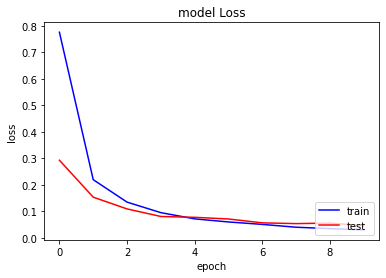

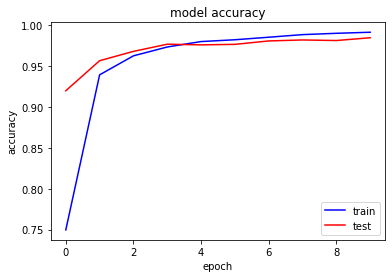

In [17]:
plt.plot(MOD.history['loss'], color='b')
plt.plot(MOD.history['val_loss'], color='r')
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.show()


plt.plot(MOD.history['acc'], color='b')
plt.plot(MOD.history['val_acc'], color='r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Text(69.0, 0.5, 'Truth')

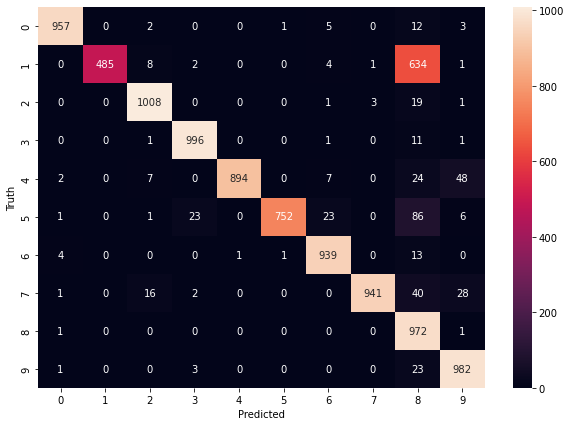

In [18]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu'))#
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.05))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1384960   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [20]:
MOD_1=model.fit(x_train, y_train,
            validation_data=(X_test, Y_test),
            epochs=10,
            batch_size=1024,
            verbose=1)

Epoch 1/10
59/59 [==============================] - 8s 141ms/step - loss: 0.2238 - acc: 0.9326 - val_loss: 1.2629 - val_acc: 0.7469
Epoch 2/10
59/59 [==============================] - 6s 103ms/step - loss: 0.0552 - acc: 0.9845 - val_loss: 0.9251 - val_acc: 0.9441
Epoch 3/10
59/59 [==============================] - 6s 109ms/step - loss: 0.0314 - acc: 0.9918 - val_loss: 0.6285 - val_acc: 0.9746
Epoch 4/10
59/59 [==============================] - 7s 111ms/step - loss: 0.0193 - acc: 0.9956 - val_loss: 0.3503 - val_acc: 0.9815
Epoch 5/10
59/59 [==============================] - 6s 103ms/step - loss: 0.0113 - acc: 0.9981 - val_loss: 0.1786 - val_acc: 0.9866
Epoch 6/10
59/59 [==============================] - 6s 101ms/step - loss: 0.0068 - acc: 0.9991 - val_loss: 0.0970 - val_acc: 0.9859
Epoch 7/10
59/59 [==============================] - 6s 104ms/step - loss: 0.0043 - acc: 0.9997 - val_loss: 0.0578 - val_acc: 0.9879
Epoch 8/10
59/59 [==============================] - 6s 104ms/step - loss: 0.

Text(69.0, 0.5, 'Truth')

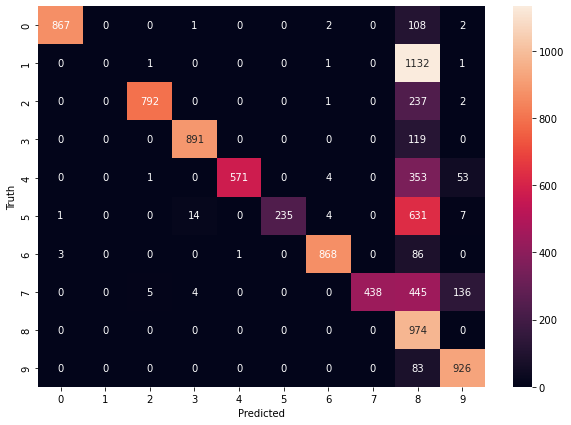

In [21]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

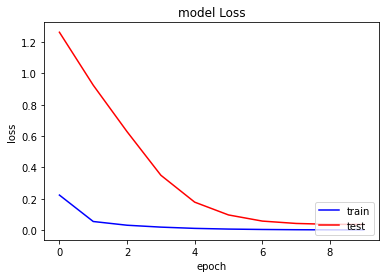

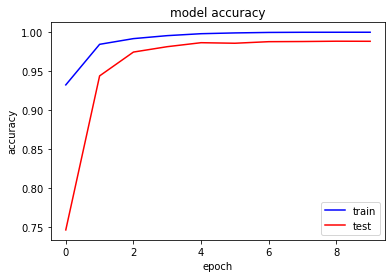

In [22]:
plt.plot(MOD_1.history['loss'], color='b')
plt.plot(MOD_1.history['val_loss'], color='r')
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.show()


plt.plot(MOD_1.history['acc'], color='b')
plt.plot(MOD_1.history['val_acc'], color='r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
model.save("C:/Users/bahas/Desktop/IA2/reconnaissance de chiffre/model_hand.h5")